### Иллюстрация примера из книги С. Николенко и др. (стр. 197):  


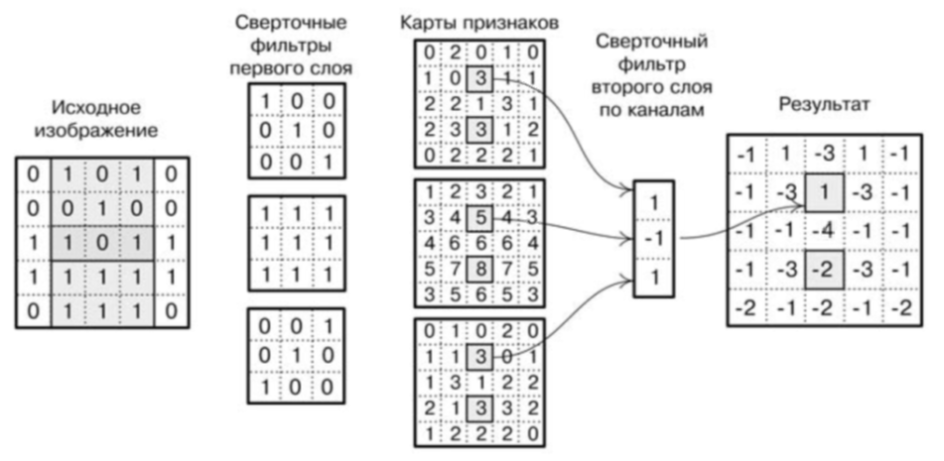

In [1]:
import torch
import torch.nn as nn

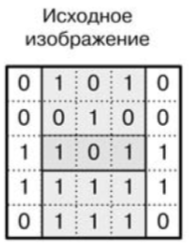

In [10]:
input_data = [[[
    [0., 1., 0., 1., 0.],
    [0., 0., 1., 0., 0.],
    [1., 1., 0., 1., 1.],
    [1., 1., 1., 1., 1.],
    [0., 1., 1., 1., 0.],
]]]
input_data = torch.tensor(input_data)

print(f'input_data.shape = {input_data.shape}')
print(f'\ninput_data:\n{input_data}')

input_data.shape = torch.Size([1, 1, 5, 5])

input_data:
tensor([[[[0., 1., 0., 1., 0.],
          [0., 0., 1., 0., 0.],
          [1., 1., 0., 1., 1.],
          [1., 1., 1., 1., 1.],
          [0., 1., 1., 1., 0.]]]])


---
Создаем первый свёрточный слой (3 фильтра):

In [11]:
conv_first = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
conv_first

Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

Начальные случайные значения весов фильтров:

In [12]:
print(f'conv_first.weight:\n{conv_first.weight.data}')
print(f'\nconv_first.bias:\n{conv_first.bias.data}')

conv_first.weight:
tensor([[[[-0.2220, -0.1147, -0.2100],
          [-0.3191,  0.2856,  0.2606],
          [-0.0872, -0.3147,  0.1798]]],


        [[[-0.2723,  0.1748,  0.2258],
          [ 0.0865,  0.2492, -0.0870],
          [ 0.2217,  0.1066, -0.1012]]],


        [[[ 0.2972,  0.3012, -0.2828],
          [ 0.1234,  0.0814,  0.1637],
          [ 0.2175, -0.2763,  0.1807]]]])

conv_first.bias:
tensor([-0.2185, -0.1560, -0.1801])


---
Задаем веса фильтров, как в примере:  

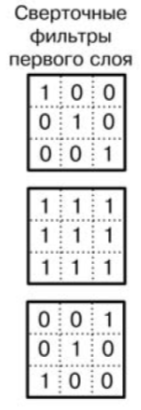

In [13]:
w1 = [
    [1., 0., 0.],
    [0., 1., 0.],
    [0., 0., 1.]
]

w2 = [
    [1., 1., 1.],
    [1., 1., 1.],
    [1., 1., 1.]
]

w3 = [
    [0., 0., 1.],
    [0., 1., 0.],
    [1., 0., 0.]
]

with torch.no_grad():
    conv_first.weight[0][0] = torch.tensor(w1, requires_grad=True)
    conv_first.weight[1][0] = torch.tensor(w2, requires_grad=True)
    conv_first.weight[2][0] = torch.tensor(w3, requires_grad=True)
    conv_first.bias.data = torch.tensor([0., 0., 0.])

Проверяем, что веса установлены правильно:

In [14]:
print(f'conv_first.weight:\n{conv_first.weight.data}')
print(f'\nconv_first.bias:\n{conv_first.bias.data}')

conv_first.weight:
tensor([[[[1., 0., 0.],
          [0., 1., 0.],
          [0., 0., 1.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],


        [[[0., 0., 1.],
          [0., 1., 0.],
          [1., 0., 0.]]]])

conv_first.bias:
tensor([0., 0., 0.])


---
Применяем первый свёрточный слой к входным данным:  

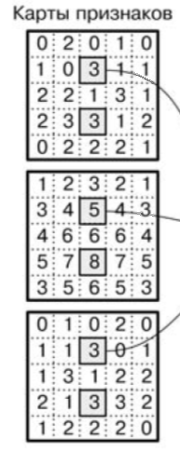

In [15]:
output_first = conv_first(input_data)
output_first

tensor([[[[0., 2., 0., 1., 0.],
          [1., 0., 3., 1., 1.],
          [2., 2., 1., 3., 1.],
          [2., 3., 3., 1., 2.],
          [0., 2., 2., 2., 1.]],

         [[1., 2., 3., 2., 1.],
          [3., 4., 5., 4., 3.],
          [4., 6., 6., 6., 4.],
          [5., 7., 8., 7., 5.],
          [3., 5., 6., 5., 3.]],

         [[0., 1., 0., 2., 0.],
          [1., 1., 3., 0., 1.],
          [1., 3., 1., 2., 2.],
          [2., 1., 3., 3., 2.],
          [1., 2., 2., 2., 0.]]]], grad_fn=<ThnnConv2DBackward>)

---
Задаем второй свёрточный слой:

In [16]:
conv_second = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=1, padding=0)
conv_second

Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))

---
Задаем веса фильтров, как в примере:  

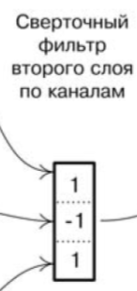

In [17]:
with torch.no_grad():
    conv_second.weight[0][0][0][0] = 1
    conv_second.weight[0][1][0][0] = -1
    conv_second.weight[0][2][0][0] = 1
    conv_second.bias.data = torch.tensor([0.])

Проверяем, что веса установлены правильно:

In [18]:
print(f'conv_second.weight:\n{conv_second.weight.data}')
print(f'\nconv_second.bias:\n{conv_second.bias.data}')

conv_second.weight:
tensor([[[[ 1.]],

         [[-1.]],

         [[ 1.]]]])

conv_second.bias:
tensor([0.])


---
Применяем второй свёрточный слой к картам признаков первого слоя:  

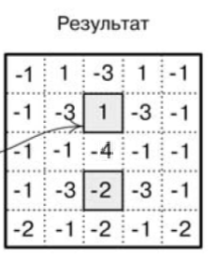

In [19]:
output_second = conv_second(output_first)
output_second

tensor([[[[-1.,  1., -3.,  1., -1.],
          [-1., -3.,  1., -3., -1.],
          [-1., -1., -4., -1., -1.],
          [-1., -3., -2., -3., -1.],
          [-2., -1., -2., -1., -2.]]]], grad_fn=<ThnnConv2DBackward>)